# El Da7ee7 Episodes Data Analysis

This project is an exploratory data analysis (EDA) of the popular Arabic YouTuber Ahmed El-Ghandour **El Da7ee7**. The goal is to analyze and visualize patterns across episodes, including topics, durations, views, and release dates.

Content:
- [Dataset Overview](#Dataset-Overview)
- [Duration vs Views](#Duration-vs-Views)
- [Removing outliers](#Removing-outliers)

# Dataset Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re
import json

In [2]:
data = pd.read_excel('cleaned_d7ee7_data.xlsx')

In [3]:
data.head()

,Title,Description,Channel,URL,Views,Likes,Comments,Duration,Duration_seconds
0,ابن مجدي عبد الغني (Epigenetics),مجدي عبد الغني أفحم الناس بضربة الجزاء لكن في ...,Da7ee7 - الدحيح,https://www.youtube.com/watch?v=shkThcSCWqM,617313,22053,780,PT4M28S,268
1,ابن مجدي عبد الغني (Epigenetics),مجدي عبد الغني أفحم الناس بضربة الجزاء لكن في ...,Da7ee7 - الدحيح,https://www.youtube.com/watch?v=shkThcSCWqM,617313,22053,780,PT4M28S,268
2,إنت جامد,"لمتابعة ""الدحيح"" \nhttp://ajar.io/ryr6j\n\nالد...",AJ+ كبريت,https://www.youtube.com/watch?v=TG3vHrlgczM,1627517,61436,1720,PT4M29S,269
3,ماذا قال عن الأب والأم والعلاقات عن بعد؟,ماذا قال الدحيح عن الأب والأم والعلاقات عن بعد...,New Media Academy Life,https://www.youtube.com/watch?v=UXbGqkCE7Qw,96514,2865,100,PT4M44S,284
4,ليه ما بنتكلمش زي الاجانب؟ (Speech Perception),لمشاهدة الحلقة الأولي من الكورة مع السلامة - ا...,Da7ee7 - الدحيح,https://www.youtube.com/watch?v=z9VlaSRmcWE,2232645,105597,2060,PT4M46S,286


In [4]:
data.tail()

,Title,Description,Channel,URL,Views,Likes,Comments,Duration,Duration_seconds
613,دونالد ترامب,في رحلة تحوله من رجل أعمال ونجم تليفزيون الواق...,New Media Academy Life,https://www.youtube.com/watch?v=uA-h1CmScHQ,5064246,102744,3283,PT49M42S,2982
614,ألف سنة من الإنهيار,لماذا لا يتكلم المصريون الحاليون نفس لغة المصر...,New Media Academy Life,https://www.youtube.com/watch?v=HG3xQjwenTc,3442237,84557,7442,PT51M19S,3079
615,الصعاليك,في قلب شبه الجزيرة العربية، خرج مجموعة من الرج...,New Media Academy Life,https://www.youtube.com/watch?v=WQj_OUBaMg0,4006370,95328,4472,PT53M43S,3223
616,جراح القلب,تدور الحلقة حول الجراح السير مجدي يعقوب وكيف ت...,New Media Academy Life,https://www.youtube.com/watch?v=9ZTCUyhoknU,3765475,172175,5960,PT58M39S,3519
617,فلسطين .. حكاية الأرض Palestine .. a Tale of Land,هكذا بدأت الحكاية\n0:00-12:58 الطنطورة \n12:59...,New Media Academy Life,https://www.youtube.com/watch?v=f0oy-NicIgE,25832260,1203867,56842,PT1H2M36S,3756


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             618 non-null    object
 1   Description       618 non-null    object
 2   Channel           618 non-null    object
 3   URL               618 non-null    object
 4   Views             618 non-null    int64 
 5   Likes             618 non-null    int64 
 6   Comments          618 non-null    int64 
 7   Duration          618 non-null    object
 8   Duration_seconds  618 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 43.6+ KB


In [6]:
data.describe()

,Views,Likes,Comments,Duration_seconds
count,6.180000e+02,6.180000e+02,618.000000,618.000000
mean,3.377930e+06,1.252703e+05,3740.061489,1212.637540
std,2.167914e+06,8.534399e+04,3904.670807,578.949612
min,7.858300e+04,2.246000e+03,54.000000,268.000000
25%,2.208437e+06,7.845475e+04,1933.500000,746.750000
50%,3.057056e+06,1.087010e+05,3051.500000,1172.500000
75%,4.168032e+06,1.554615e+05,4363.750000,1598.750000
max,2.583226e+07,1.203867e+06,56842.000000,3756.000000


In [7]:
data.duplicated().sum()

np.int64(24)

In [8]:
data.drop_duplicates(subset=['URL'], inplace=True)

In [9]:
# Add new column with duration in minutes, rounded to nearest whole number
data['Duration_minutes'] = (data['Duration_seconds'] / 60).round().astype(int)

In [10]:
# Function to remove Arabic letters from channel name
def remove_arabic(text):
    # Arabic Unicode block: \u0600 to \u06FF
    # This regex removes all Arabic characters from the string
    return re.sub(r'[\u0600-\u06FF]+', '', text).strip()

In [11]:
# Apply the function to the 'Channel' column to clean Arabic letters
data['Channel'] = data['Channel'].apply(remove_arabic)

## Duration vs Views

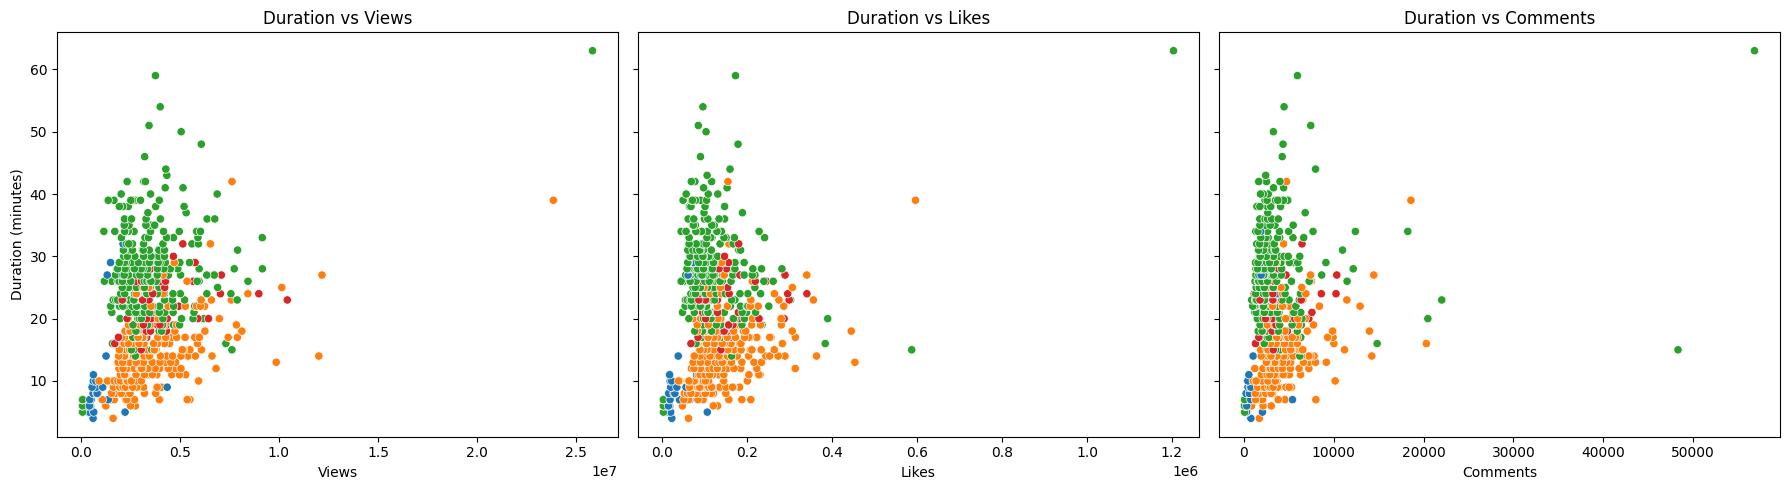

In [12]:
# plot Duration of episode vs Views, Likes, and Comments
# Set up 3 horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Metrics for X-axis
metrics = ['Views', 'Likes', 'Comments']

# Draw scatter plots without individual legends
for i, metric in enumerate(metrics):
    sns.scatterplot(data=data, x=metric, y='Duration_minutes', hue='Channel', ax=axes[i], legend=False)
    axes[i].set_title(f'Duration vs {metric}')
    axes[i].set_xlabel(metric)
    if i == 0:
        axes[i].set_ylabel('Duration (minutes)')
    else:
        axes[i].set_ylabel('')
        
plt.tight_layout()
plt.show()

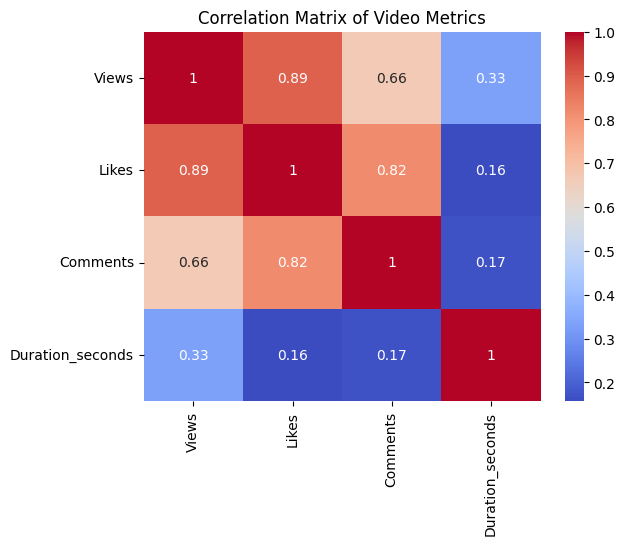

In [13]:
# Plot heatmap for views, likes and comments
numeric_data = data[['Views', 'Likes', 'Comments', 'Duration_seconds']]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Video Metrics')
plt.show()

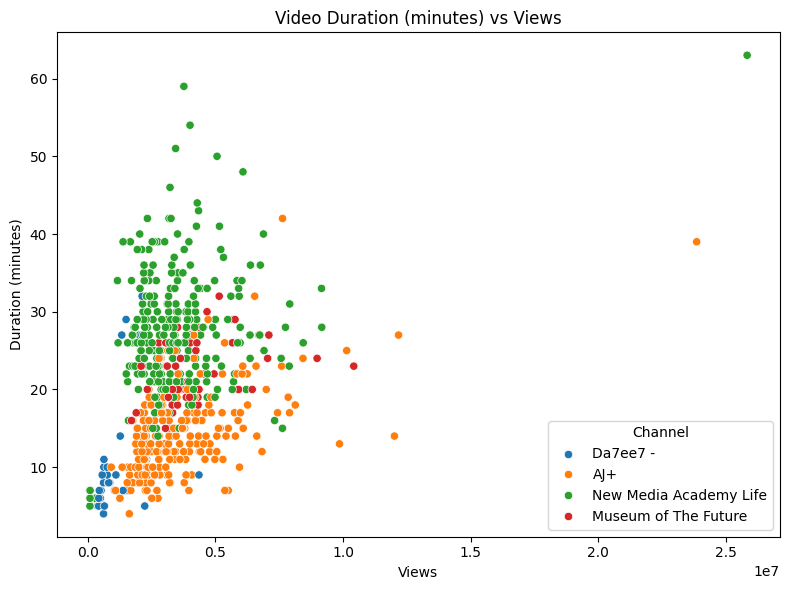

In [14]:
# Draw scatter plot for Views vs Duration in minutes
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='Views',
    y='Duration_minutes',
    hue='Channel',
    ax=ax
)

# Set axis titles and main title
ax.set_title('Video Duration (minutes) vs Views')
ax.set_xlabel('Views')
ax.set_ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

### Removing shorts


In [15]:
# Remove episodes that are likely Shorts or excerpts
# These often start with "ماذا قال الدحيح عن" and are not full episodes

data.sort_values(by='Views',ascending=False).tail(5)

,Title,Description,Channel,URL,Views,Likes,Comments,Duration,Duration_seconds,Duration_minutes
33,ماذا قال عن شخصيات وأحداث من التاريخ؟,ماذا قال الدحيح عن شخصيات وأحداث من التاريخ؟\n...,New Media Academy Life,https://www.youtube.com/watch?v=rLR_EsEUmuY,91963,2257,86,PT7M9S,429,7
16,ماذا قال عن الرعب والزلازل ونهاية العالم؟,ماذا قال الدحيح عن الرعب والزلازل ونهاية العال...,New Media Academy Life,https://www.youtube.com/watch?v=zTXXTgdz4Sk,88695,2306,54,PT6M4S,364,6
19,ماذا قال عن الحيوانات وتوم وجيري؟,ماذا قال الدحيح عن الحيوانات وتوم وجيري؟\n\n#ا...,New Media Academy Life,https://www.youtube.com/watch?v=pCCLPOVOj9c,88553,2246,69,PT6M22S,382,6
10,ماذا قال عن الحساسية والموت والمقابر؟,ماذا قال الدحيح عن الحساسية والموت والمقابر؟ \...,New Media Academy Life,https://www.youtube.com/watch?v=upJF5V4AD1Y,85611,2341,78,PT5M12S,312,5
32,ماذا قال عن برامجنا المفضلة؟,ماذا قال الدحيح عن برامجنا المفضلة؟\n\n#الدحيح...,New Media Academy Life,https://www.youtube.com/watch?v=hUN2AJU-Ty4,78583,2309,97,PT7M8S,428,7


In [16]:
# Filter and display episodes whose descriptions start with the target phrase
shorts_like_episodes = data[data['Description'].str.startswith("ماذا قال الدحيح عن", na=False)]

# Display them
shorts_like_episodes[['Title', 'Description', 'Channel', 'Views', 'Duration_minutes']].reset_index(drop=True)

,Title,Description,Channel,Views,Duration_minutes
0,ماذا قال عن الأب والأم والعلاقات عن بعد؟,ماذا قال الدحيح عن الأب والأم والعلاقات عن بعد...,New Media Academy Life,96514,5
1,ماذا قال عن الحساسية والموت والمقابر؟,ماذا قال الدحيح عن الحساسية والموت والمقابر؟ \...,New Media Academy Life,85611,5
2,ماذا قال عن الشغف والتشاؤم والخوف؟,ماذا قال الدحيح عن الشغف والتشاؤم والخوف؟ \n\n...,New Media Academy Life,360587,6
3,ماذا قال عن الرعب والزلازل ونهاية العالم؟,ماذا قال الدحيح عن الرعب والزلازل ونهاية العال...,New Media Academy Life,88695,6
4,ماذا قال عن الطبخ والأكل والدايت؟,ماذا قال الدحيح عن الطبخ والأكل والدايت؟ \n\nم...,New Media Academy Life,296728,6
5,ماذا قال عن الحيوانات وتوم وجيري؟,ماذا قال الدحيح عن الحيوانات وتوم وجيري؟\n\n#ا...,New Media Academy Life,88553,6
6,ماذا قال عن مقاييس الجمال و الأتيكيت؟,ماذا قال الدحيح عن مقاييس الجمال و الأتيكيت؟ \...,New Media Academy Life,92148,7
7,ماذا قال عن أصعب المواقف؟,ماذا قال الدحيح عن أصعب المواقف؟\n\n#الدحيح \n...,New Media Academy Life,93877,7
8,ماذا قال عن برامجنا المفضلة؟,ماذا قال الدحيح عن برامجنا المفضلة؟\n\n#الدحيح...,New Media Academy Life,78583,7
9,ماذا قال عن شخصيات وأحداث من التاريخ؟,ماذا قال الدحيح عن شخصيات وأحداث من التاريخ؟\n...,New Media Academy Life,91963,7


In [17]:
data = data[~data['Description'].str.startswith("ماذا قال الدحيح عن", na=False)]

In [18]:
data.sort_values(by='Views',ascending=False).tail(5)

,Title,Description,Channel,URL,Views,Likes,Comments,Duration,Duration_seconds,Duration_minutes
11,الكفتجي (Selffulfilling Prophecy),شايف ايه في الكوبايا ؟\nhttps://www.patreon.co...,Da7ee7 -,https://www.youtube.com/watch?v=obhciS90EWA,491475,17008,294,PT5M46S,346,6
40,بوشكاش و الانتخابات (DunningKruger Effect),الغبي فاكر نفسه ذكي و الذكي فاكر نفسه غبي ! \n...,Da7ee7 -,https://www.youtube.com/watch?v=hA2y3DwLYug,451964,18034,773,PT7M23S,443,7
21,سولوفان الارهابي (Behavioral Confirmation),حلقة تقيلة شوية :) يا جماعا سولوفان كان كويس !...,Da7ee7 -,https://www.youtube.com/watch?v=ky_M4DE0Y4s,431384,14057,319,PT6M28S,388,6
6,من غير ضرائب (Transfer Pricing),تسريب اوراق بنما ! \nSubscribe Here http://bit...,Da7ee7 -,https://www.youtube.com/watch?v=LLqlyv6OEHA,426819,13756,297,PT5M7S,307,5
5,الطويل الزعزوع (Heightism),الطول هيبة والقصر خيبة ! \nhttps://www.patreon...,Da7ee7 -,https://www.youtube.com/watch?v=TG7xcl1dMnM,378430,12189,330,PT4M51S,291,5


## Removing outliers

##### We remove episodes with extremely high or low views because:
##### - Very high views might be viral/special events not representative of typical performance
##### - Very low views could be due to upload errors, unlisted videos, or bad timing

In [19]:
# Calculate the average number of views
average_views = data['Views'].mean()
print(f"Average Views: {average_views:,.0f}")

Average Views: 3,536,348


In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Views'].quantile(0.25)
Q3 = data['Views'].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

# Outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound (outlier threshold): {upper_bound:,.0f}")

Upper bound (outlier threshold): 7,100,944


In [21]:
# Sort episodes by Views in descending order
top_viewed_episodes = data.sort_values(by='Views', 
                                       ascending=False)[['Title', 'Views', 'Duration_minutes', 'Channel']].reset_index(drop=True)

# Display the top results
IQR_method = top_viewed_episodes[top_viewed_episodes['Views']>=upper_bound]

print(f'Episodes to be removed: {len(IQR_method)}')

Episodes to be removed: 24


In [22]:
# Trying Modified Z-Score (Median Absolute Deviation - MAD)
median = data['Views'].median()
mad = np.median(np.abs(data['Views'] - median))

data['Views_mod_z'] = 0.6745 * (data['Views'] - median) / mad

# Any video with |Modified Z| > 3.5 is considered an outlier
outliers_mod_z = data[np.abs(data['Views_mod_z']) > 3.5]

print(f'Episodes to be removed: {len(outliers_mod_z)}')

Episodes to be removed: 16


In [23]:
# Both Methods to remove many and importanat episodes
# we only remove biggest two episodes in views
top_viewed_episodes.head()

,Title,Views,Duration_minutes,Channel
0,فلسطين .. حكاية الأرض Palestine .. a Tale of Land,25832260,63,New Media Academy Life
1,الحرب العالمية الثانية,23855609,39,AJ+
2,الفراعنة في 1602 ثانية,12175241,27,AJ+
3,هتلر,12013980,14,AJ+
4,بناء الأهرامات,10421843,23,Museum of The Future


In [24]:
titles_to_remove = top_viewed_episodes.head(2)['Title']
data = data[~data['Title'].isin(titles_to_remove)].reset_index(drop=True)

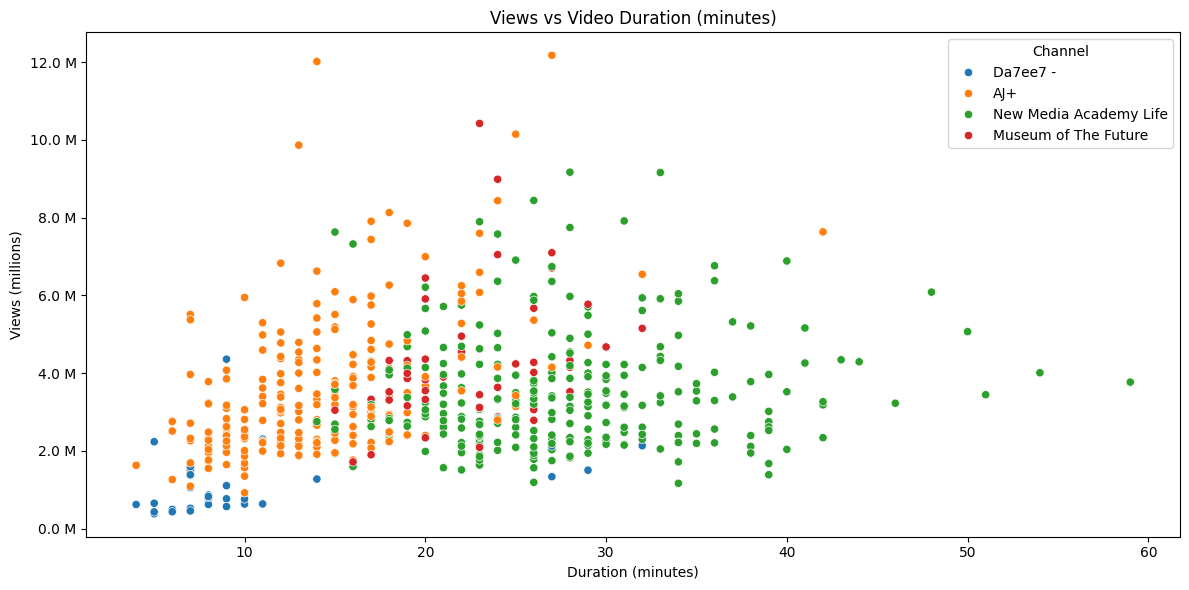

In [25]:
# Draw scatter plot for Views vs Duration in minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='Duration_minutes',
    y='Views',
    hue='Channel',
    ax=ax
)

# Set axis titles and main title
ax.set_title('Views vs Video Duration (minutes)')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Views (millions)')

# Apply y-axis formatter to millions
million_formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f} M')
ax.yaxis.set_major_formatter(million_formatter)  # <-- fixed line

plt.tight_layout()
plt.show()